In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "4"
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df.info()
df.describe()
df.isnull().sum()
df['Category'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

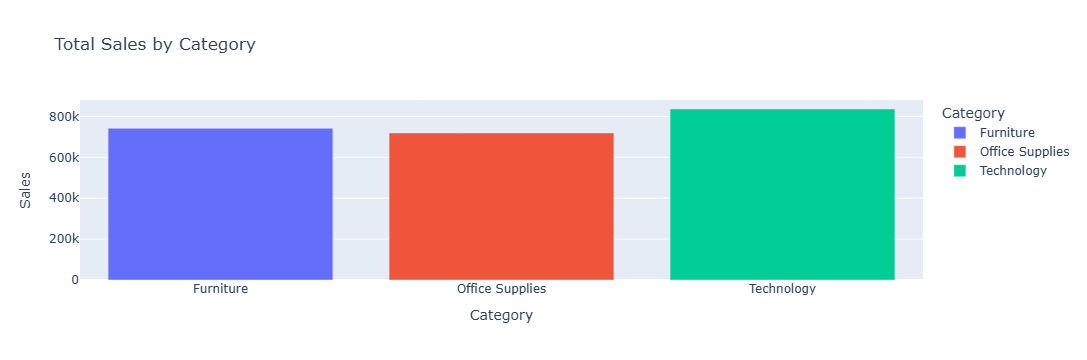

In [26]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_category, x='Category', y='Sales', title='Total Sales by Category', color='Category')
fig.show()

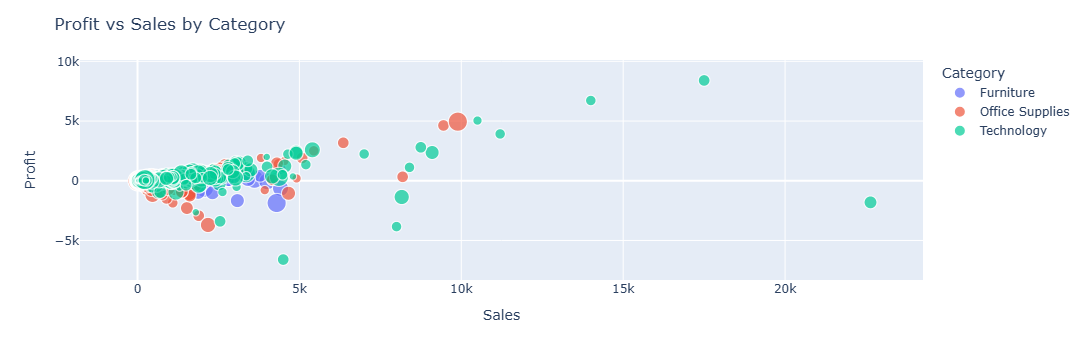

In [27]:
fig = px.scatter(df, x='Sales', y='Profit', color='Category', size='Quantity', hover_data=['Product Name'])
fig.update_layout(title='Profit vs Sales by Category')
fig.show()

In [28]:
category_dropdown = widgets.Dropdown(
    options=df['Category'].unique(),
    description='Category:',
)

def update_plot(category):
    filtered_df = df[df['Category'] == category]
    sub_sales = filtered_df.groupby('Sub-Category')['Sales'].sum().reset_index()
    fig = px.bar(sub_sales, x='Sub-Category', y='Sales', title=f'Sales by Sub-Category for {category}', color='Sub-Category')
    fig.show()

interact(update_plot, category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('Furniture', 'Office Supplies', 'Technology')…

<function __main__.update_plot(category)>

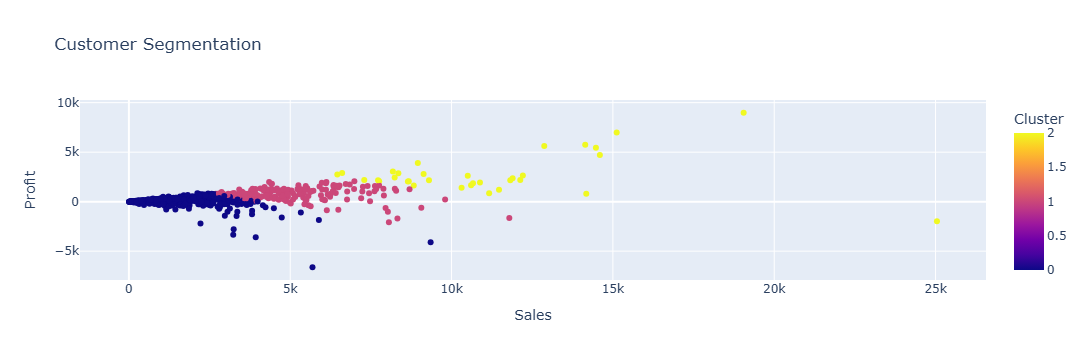

In [29]:
customer_df = df.groupby('Customer ID')[['Sales', 'Profit']].sum()
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_scaled)

fig = px.scatter(customer_df, x='Sales', y='Profit', color='Cluster', title='Customer Segmentation', hover_data=[customer_df.index])
fig.show()

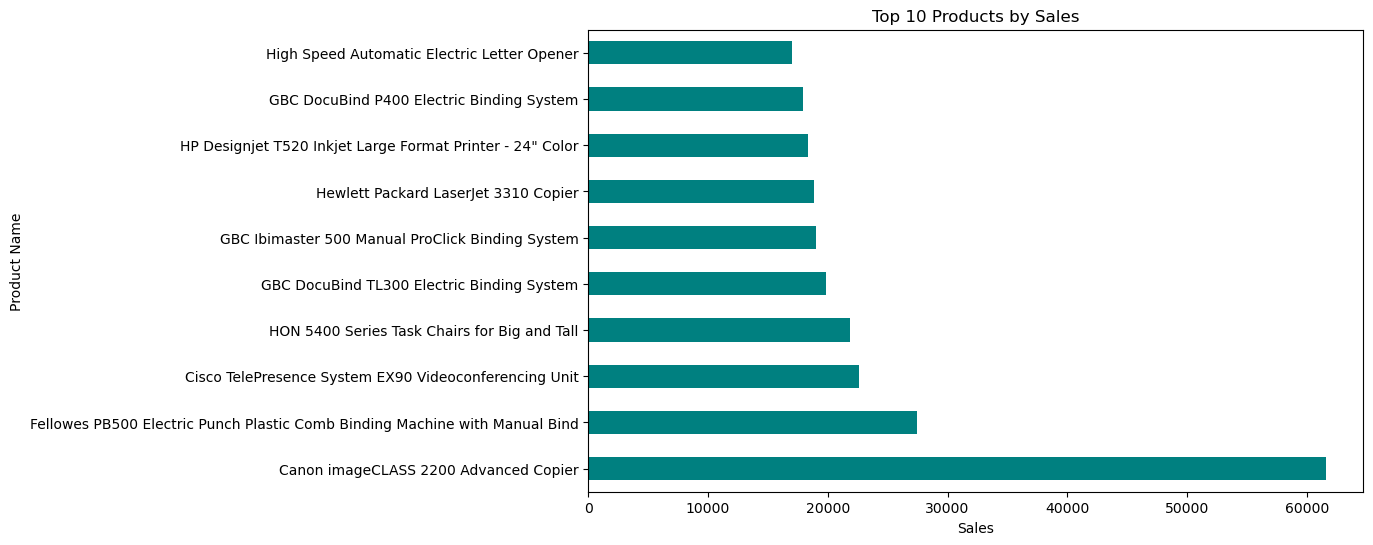

In [30]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), color='teal')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()
